In [1]:
from dataset import *
from feature import *
from unsuperivesd import *
import numpy as np


In [ ]:
#这是生成数据用的，从main里魔改的，只处理traindata
dataset_path = './IRMAS-TrainingData'
is_gen_mfcc = False
is_gen_dataset = False
is_delete_npy = False

if is_delete_npy:
    npy_file = glob(f'{dataset_path}/*/*.npy')
    for file in npy_file:
        print(f'remove file {file}')
        os.remove(file)
    exit(0)

if is_gen_dataset:
    for i in range(1, 4):
        generate_dataset(f'./IRMAS-TrainingData', i)
    exit(0)
if is_gen_mfcc:
    generate_features(dataset_path)
    exit(0)

In [61]:
labels = ['cel', 'cla', 'flu', 'gac', 'gel', 'org',
            'pia', 'sax', 'tru', 'vio', 'voi']  # 需要识别的乐器

dataset_path = './IRMAS-TrainingData'
n_centers=len(labels)
n_count = 300 # 每个乐器采样多少次
X=np.zeros([n_count*n_centers,40])
# feature有40维
i=0
for label in labels:
    my_labels=[label]
    label_dict = {l: (True, n_count) if l == label else (False, n_count) for l in my_labels}
    # print(label_dict)
    mfccs, lbs = get_data_list_weighted_npy(dataset_path, label_dict,1)
    features = get_feature_npy(mfccs)
    X[i*n_count:(i+1)*n_count,]=features
    i=i+1

mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)


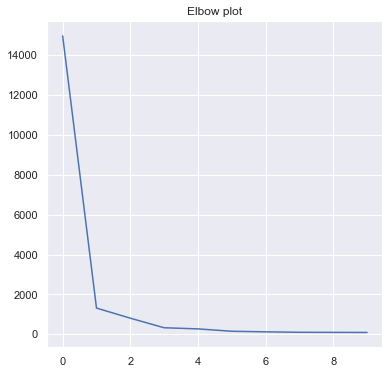

In [89]:
#pca_plot(X)
PCA_model = PCA(n_components=10)
PCA_model.fit(X)
PCA_var = PCA_model.explained_variance_
plt.figure(figsize=(6,6)) 
plt.plot(np.arange(0, 10), PCA_var)
plt.title('Elbow plot')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

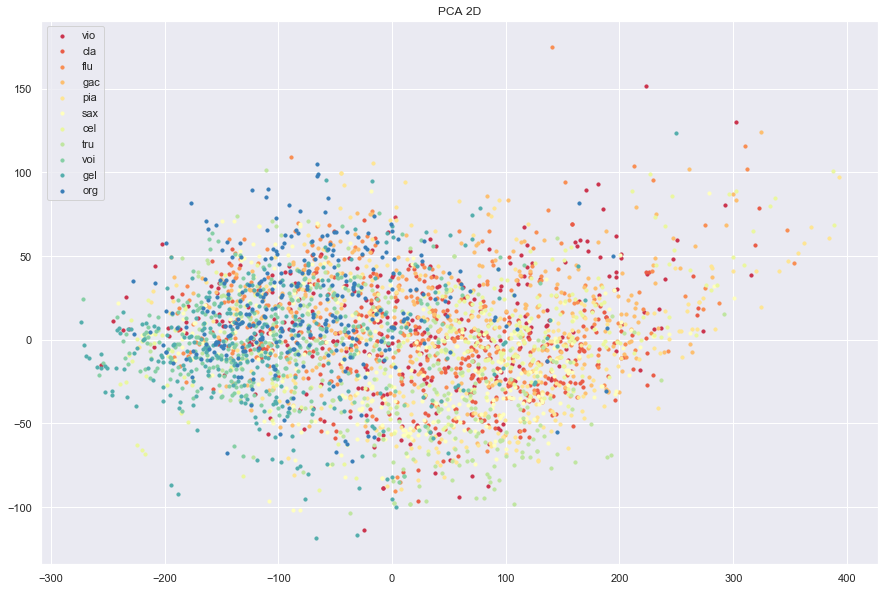

In [84]:
n=2
sns.set()
PCA_model = PCA(n_components=n)
PCA_model.fit(X)
X_new = PCA_model.fit_transform(X)
fig = plt.figure(figsize=(15, 10))
colors = sns.color_palette("Spectral", len(labels))
for i in range(0, len(labels)):
    x = X_new[i * n_count:(i + 1) * n_count, 0]
    y = X_new[i * n_count:(i + 1) * n_count, 1]
    plt.scatter(x, y, c=colors[i], marker='o', label=labels[i], s=10)
print("plot 2d")
plt.legend()
plt.title('PCA 2D')
plt.show()

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram
#绘制树状图
plt.figure(figsize=(10,6))
Z = linkage(X, method='ward', metric='euclidean')
p = dendrogram(Z, 0,labels=labels*20, leaf_rotation=90,color_threshold=250)
plt.show()

IndexError: list index out of range

Text(0.5, 1, 'Hierarchical Clustering at 5')

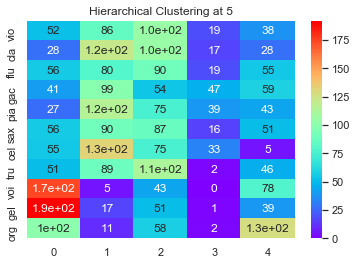

In [72]:
Y_predict = hierarchical_predict(X,5)  # 层次聚类
outcome_print(Y_predict, labels, n_count)  # 聚类结果可视化
plt.title('Hierarchical Clustering at 5')

Text(0.5, 1, 'Gaussian Mixture Model at 3')

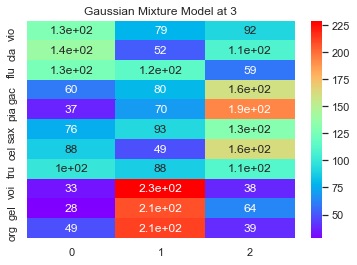

In [79]:
gmm = GaussianMixture(n_components=3, covariance_type="diag").fit(X)
Y_predict = GaussianMixture.predict(gmm, X)  # predict_proba
outcome_print(Y_predict, labels, 300)  # 聚类结果可视化
plt.title('Gaussian Mixture Model at 3')

array([[ 0, 17, 17, 29, 15, 18, 45, 59, 24, 45, 31],
       [ 3,  9, 14, 30,  7, 48, 42, 68, 12, 32, 35],
       [ 1, 25, 31, 27, 23, 21, 49, 46, 15, 57,  5],
       [ 5, 18, 15, 38, 13, 53, 23,  7, 83, 22, 23],
       [ 7, 31, 13, 52,  5, 50, 11,  5,  6, 21, 99],
       [26, 27, 16, 29, 25, 65, 19, 24,  7, 25, 37],
       [ 6, 21, 28, 38,  4, 42, 49, 21, 50, 10, 31],
       [47, 21, 26, 26,  7, 29, 36, 28,  7, 41, 32],
       [ 1, 81,  8, 31, 57,  2, 17,  4, 39, 55,  5],
       [ 2, 73,  3, 52, 73,  5, 13,  3, 18, 42, 16],
       [ 9, 74, 16, 49, 36,  1, 15,  4,  8, 84,  4]])

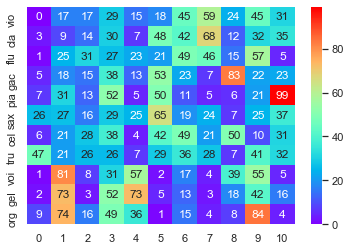

In [77]:
Y_predict=gmm_predict(X,11)
outcome_print(Y_predict, labels, n_count)  # 聚类结果可视化

下面的思路是：

既然11分类不行，那我们先尝试 11乘10 个二分类器，看一下二分类的正确率

需要代码：循环，二分类，正确率，存矩阵，画图


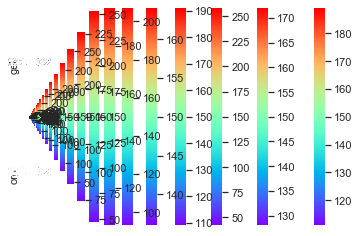

In [80]:
# X还是300*11行的矩阵
# n_count=300
X_sub=np.zeros([2*n_count,40])
true_rate = np.eye(11)#准确度矩阵
for i in range(0,11):
    for j in range(i+1,11):
        X_sub[0:n_count,]=X[i*n_count:(i+1)*n_count,]
        X_sub[n_count:2*n_count,]=X[j*n_count:(j+1)*n_count,]
        Y_predict=gmm_predict(X_sub,2)
        labels_sub=[labels[i],labels[j]]
        count_martix = outcome_print(Y_predict, labels_sub, n_count)
        true_rate1=(count_martix[0,0]+count_martix[1,1])/2/n_count
        true_rate2=(count_martix[1,0]+count_martix[0,1])/2/n_count
        true_rate[i,j]=max(true_rate1,true_rate2)
        #true_rate[j,i]=true_rate[i,j]


Text(0.5, 1, 'Accuracy of classification')

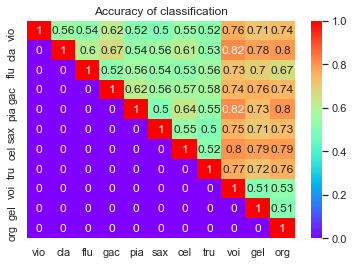

In [81]:
ax1 = sns.heatmap(true_rate,cmap="rainbow", annot=True,)# cmap="rainbow"
ax1.set_yticklabels(labels)
ax1.set_xticklabels(labels)
plt.title('Accuracy of classification')

plot 2d


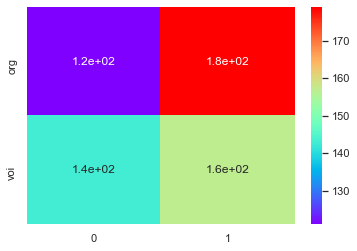

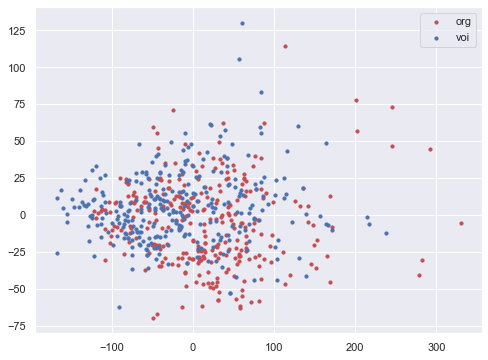

In [7]:
#cla*gel i=1 j=4
#org*voi 
i=5 
j=10
X_sub=np.zeros([2*n_count,40])
X_sub[0:n_count,]=X[i*n_count:(i+1)*n_count,]
X_sub[n_count:2*n_count,]=X[j*n_count:(j+1)*n_count,]
Y_predict=gmm_predict(X_sub,2)
labels_sub=[labels[i],labels[j]]
count_martix = outcome_print(Y_predict, labels_sub, n_count)
true_rate1=(count_martix[0,0]+count_martix[1,1])/2/n_count
true_rate2=(count_martix[1,0]+count_martix[0,1])/2/n_count
max(true_rate1,true_rate2)

n=2
sns.set()
PCA_model = PCA(n_components=n)
PCA_model.fit(X_sub)
X_new = PCA_model.fit_transform(X_sub)
fig = plt.figure(figsize=(8, 6))
x = X_new[0:n_count, 0]
y = X_new[0:n_count, 1]
plt.scatter(x, y, c='r', marker='o', label=labels[i], s=10)
x = X_new[n_count:2 * n_count, 0]
y = X_new[n_count:2 * n_count, 1]
plt.scatter(x, y, c='b', marker='o', label=labels[j], s=10)
print("plot 2d")
plt.legend()
plt.show()

In [59]:
GaussianMixture?

Init signature:
GaussianMixture(
    n_components=1,
    covariance_type='full',
    tol=0.001,
    reg_covar=1e-06,
    max_iter=100,
    n_init=1,
    init_params='kmeans',
    weights_init=None,
    means_init=None,
    precisions_init=None,
    random_state=None,
    warm_start=False,
    verbose=0,
    verbose_interval=10,
)
Docstring:     
Gaussian Mixture.

Representation of a Gaussian mixture model probability distribution.
This class allows to estimate the parameters of a Gaussian mixture
distribution.

Read more in the :ref:`User Guide <gmm>`.

.. versionadded:: 0.18

Parameters
----------
n_components : int, defaults to 1.
    The number of mixture components.

covariance_type : {'full' (default), 'tied', 'diag', 'spherical'}
    String describing the type of covariance parameters to use.
    Must be one of:

    'full'
        each component has its own general covariance matrix
    'tied'
        all components share the same general covariance matrix
    'diag'
        ea

In [66]:
#改一下labels的顺序
labels = ['vio','cla', 'flu', 'gac',
            'pia', 'sax','cel','tru','voi','gel','org']  # 需要识别的乐器
dataset_path = './IRMAS-TrainingData'
n_centers=len(labels)
n_count = 300 # 每个乐器采样多少次
X=np.zeros([n_count*n_centers,40])
# feature有40维
i=0
for label in labels:
    my_labels=[label]
    label_dict = {l: (True, n_count) if l == label else (False, n_count) for l in my_labels}
    # print(label_dict)
    mfccs, lbs = get_data_list_weighted_npy(dataset_path, label_dict,2)
    features = get_feature_npy(mfccs)
    X[i*n_count:(i+1)*n_count,]=features
    i=i+1

mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)
mfccs.shape = (300, 40, 259)


In [8]:
num=3
if num==1 or num==2:
    print(num)
else:
    print(0)

0


In [45]:
['cel','hel']*3

['cel', 'hel', 'cel', 'hel', 'cel', 'hel']